In [23]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import transforms
from joypy import joyplot
import squarify
import plotly.express as px
from itertools import product


In [24]:
# Reading milk production data
milk_prod_d = pd.read_csv("/Users/yashsingh/Desktop/Data Analytics and Visualization/Week 5/Milk_Production_2007_2012.csv", index_col='States/Uts')
milk_prod_d.head()

# Reading egg production data
egg_prod_d = pd.read_csv(
    "/Users/yashsingh/Desktop/Data Analytics and Visualization/Week 5/Milk_Production_2007_2012.csv", index_col='States/Uts')
egg_prod_d.columns = milk_prod_d.columns
egg_prod_d.head()


,2007-08,2008-09,2009-10,2010-11,2011-12
States/Uts,,,,,
Andhra Pradesh,8925,9570,10429,11203,12088
Arunachal Pradesh,32,24,26,28,22
Assam,752,753,756,790,796
Bihar,5783,5934,6124,6517,6643
Chhattisgarh,866,908,956,1029,1119


In [25]:
# Merging egg and milk production data
merged_prod_d = pd.concat([egg_prod_d, milk_prod_d], axis=1, keys=['Egg', 'Milk'])
merged_prod_d.fillna(0, inplace=True)
merged_prod_d.head()


Egg                                    Milk          \
                  2007-08 2008-09 2009-10 2010-11 2011-12 2007-08 2008-09   
States/Uts                                                                  
Andhra Pradesh       8925    9570   10429   11203   12088    8925    9570   
Arunachal Pradesh      32      24      26      28      22      32      24   
Assam                 752     753     756     790     796     752     753   
Bihar                5783    5934    6124    6517    6643    5783    5934   
Chhattisgarh          866     908     956    1029    1119     866     908   

                                           
                  2009-10 2010-11 2011-12  
States/Uts                                 
Andhra Pradesh      10429   11203   12088  
Arunachal Pradesh      26      28      22  
Assam                 756     790     796  
Bihar                6124    6517    6643  
Chhattisgarh          956    1029    1119

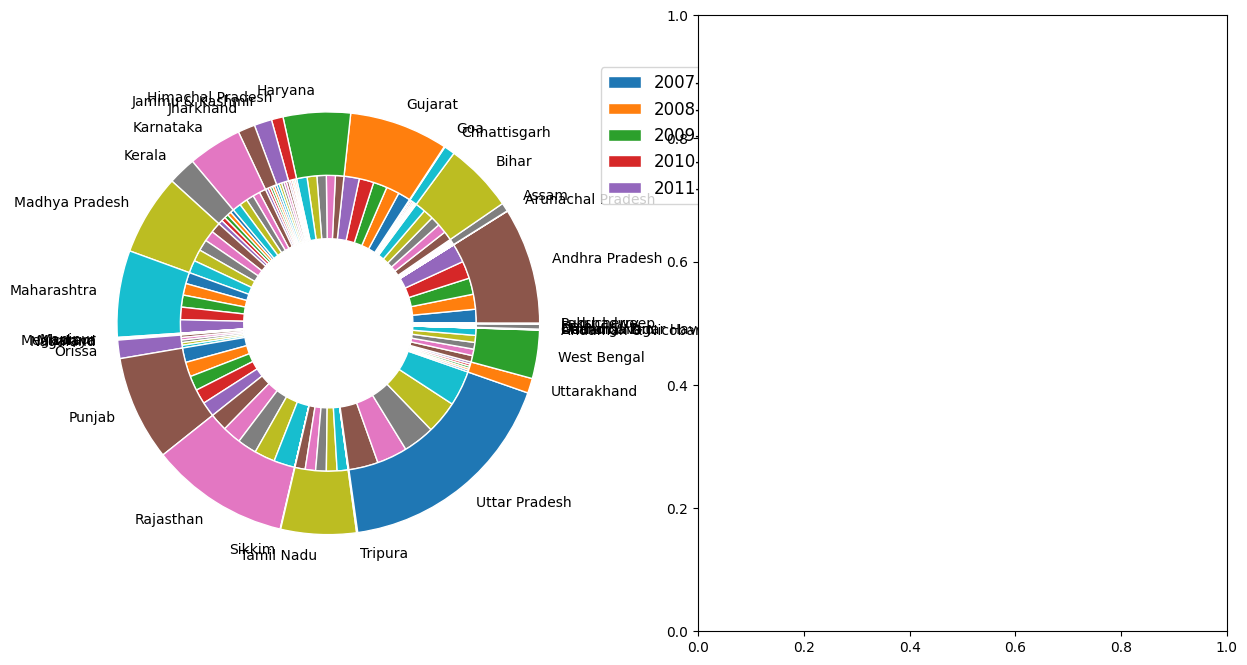

In [26]:
# Selecting regions for visualization
regions = merged_prod_d1[:35].index
cmap = plt.get_cmap("tab20c")

# Creating subplots for pie charts
_, ax = plt.subplots(1, 2, figsize=(15, 8))
size = 0.3

# Plotting pie chart for egg production
ax[0].pie(merged_prod_d.loc[regions, 'Egg'].to_numpy().flatten(),
          radius=1-size, wedgeprops=dict(width=0.3, edgecolor='w'))
ax[0].pie(merged_prod_d.loc[regions, 'Egg'].to_numpy().sum(axis=1),
          radius=1, wedgeprops=dict(width=0.3, edgecolor='w'), labels=regions)
ax[0].legend(merged_prod_d[['Egg']].columns.get_level_values(
    1), loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)


# Displaying the pie charts
plt.show()

In [27]:

# Preparing egg production data for treemap visualization
egg_production_df = merged_prod_d['Egg'].drop('All India').reset_index()
egg_production_df = egg_production_df.melt(id_vars='States/Uts', var_name='Year',
                     value_name='Production')


# Plotting treemap for egg production
fig = px.treemap(egg_production_df, path=['States/Uts', 'Year'],
                 values='Production', color_continuous_scale='RdBu')
fig.show()


In [28]:
# Preparing milk production data for treemap visualization
milk_production_df = merged_prod_d['Milk'].drop('All India').reset_index()
milk_production_df = milk_production_df.melt(id_vars='States/Uts',
                       var_name='Year', value_name='Production')

# Plotting treemap for milk production
fig = px.treemap(milk_production_df, path=['States/Uts', 'Year'],
                 values='Production', color_continuous_scale='RdBu')
fig.show()